# Importing Libraries and Files

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

In [4]:
gen_data = pd.read_csv('Plant_1_Generation_Data.csv')
wthr_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [5]:
gen_data.sample(5)

DATE_TIME  PLANT_ID       SOURCE_KEY   DC_POWER  AC_POWER  \
5141   17-05-2020 14:00   4135001  zVJPv84UY57bAof  10700.286  1044.386   
27651  29-05-2020 09:00   4135001  VHMLBKoKgIrUVDU   6907.875   676.450   
13712  22-05-2020 06:15   4135001  zBIq5rxdHJRwDNY    567.286    54.914   
11180  20-05-2020 12:15   4135001  1BY6WEcLGh8j5v7  12094.500  1179.225   
35616  02-06-2020 04:15   4135001  wCURE6d3bPkepu2      0.000     0.000   

       DAILY_YIELD  TOTAL_YIELD  
5141      5580.857    7.134e+06  
27651      821.875    7.314e+06  
13712       11.000    6.389e+06  
11180     4219.125    6.294e+06  
35616        0.000    6.915e+06

In [6]:
wthr_data.sample(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
2784  2020-06-13 20:30:00   4135001  HmiyD2TTLFNqkNe               23.695   
1462  2020-05-31 01:45:00   4135001  HmiyD2TTLFNqkNe               23.530   
742   2020-05-23 09:15:00   4135001  HmiyD2TTLFNqkNe               27.272   
1288  2020-05-29 06:15:00   4135001  HmiyD2TTLFNqkNe               20.838   
2652  2020-06-12 11:30:00   4135001  HmiyD2TTLFNqkNe               25.794   

      MODULE_TEMPERATURE  IRRADIATION  
2784              22.676        0.000  
1462              21.837        0.000  
742               46.694        0.663  
1288              20.167        0.041  
2652              40.806        0.675

# Date & Time Adjustment

In [7]:
gen_data['DATE_TIME'] = pd.to_datetime(gen_data['DATE_TIME'], format='%d-%m-%Y %H:%M')
wthr_data['DATE_TIME'] = pd.to_datetime(wthr_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Merging Power Generation and Weather Sensor Data

In [8]:
solar = pd.merge(gen_data.drop(columns = ['PLANT_ID']), wthr_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
solar.sample(5).style.background_gradient(cmap='cool')

# Adding Seperate Time and Data Columns

In [9]:

solar["DATE"] = pd.to_datetime(solar["DATE_TIME"]).dt.date
solar["TIME"] = pd.to_datetime(solar["DATE_TIME"]).dt.time
solar['DAY'] = pd.to_datetime(solar['DATE_TIME']).dt.day
solar['MONTH'] = pd.to_datetime(solar['DATE_TIME']).dt.month


solar['HOURS'] = pd.to_datetime(solar['TIME'],format='%H:%M:%S').dt.hour
solar['MINUTES'] = pd.to_datetime(solar['TIME'],format='%H:%M:%S').dt.minute
solar['TOTAL MINUTES PASS'] = solar['MINUTES'] + solar['HOURS']*60


solar["DATE_STRING"] = solar["DATE"].astype(str) # add column with date as string
solar["HOURS"] = solar["HOURS"].astype(str)
solar["TIME"] = solar["TIME"].astype(str)

solar.head(2)

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6.260e+06   
1 2020-05-15  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6.184e+06   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0               25.184              22.858          0.0  2020-05-15  00:00:00   
1               25.184              22.858          0.0  2020-05-15  00:00:00   

   DAY  MONTH HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  
0   15      5     0        0                   0  2020-05-15  
1   15      5     0        0                   0  2020-05-15

In [10]:

solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   SOURCE_KEY           68774 non-null  object        
 2   DC_POWER             68774 non-null  float64       
 3   AC_POWER             68774 non-null  float64       
 4   DAILY_YIELD          68774 non-null  float64       
 5   TOTAL_YIELD          68774 non-null  float64       
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
 9   DATE                 68774 non-null  object        
 10  TIME                 68774 non-null  object        
 11  DAY                  68774 non-null  int32         
 12  MONTH                68774 non-null  int32         
 13  HOURS                68774 non-

In [11]:

solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [12]:

solar.describe().style.background_gradient(cmap='rainbow')


# Converting Catergorical Data to Numerical Data

In [13]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(solar['SOURCE_KEY'])
solar.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6.260e+06   
1 2020-05-15  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6.184e+06   
2 2020-05-15  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6.988e+06   
3 2020-05-15  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7.603e+06   
4 2020-05-15  McdE0feGgRqW7Ca       0.0       0.0          0.0    7.159e+06   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0               25.184              22.858          0.0  2020-05-15  00:00:00   
1               25.184              22.858          0.0  2020-05-15  00:00:00   
2               25.184              22.858          0.0  2020-05-15  00:00:00   
3               25.184              22.858          0.0  2020-05-15  00:00:00   
4               25.184              22.858          0.0  2020-05-15  00:00:00   

   DAY  MONTH HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  \
0   15      5     0        0                   0  2020-05-15   
1   15      5     0        0                   0  2020-05-15   
2   15      5     0        0                   0  2020-05-15   
3   15      5     0        0                   0  2020-05-15   
4   15      5     0        0                   0  2020-05-15   

   SOURCE_KEY_NUMBER  
0                  0  
1                  1  
2                  2  
3                  3  
4                  4

# Data Visualization

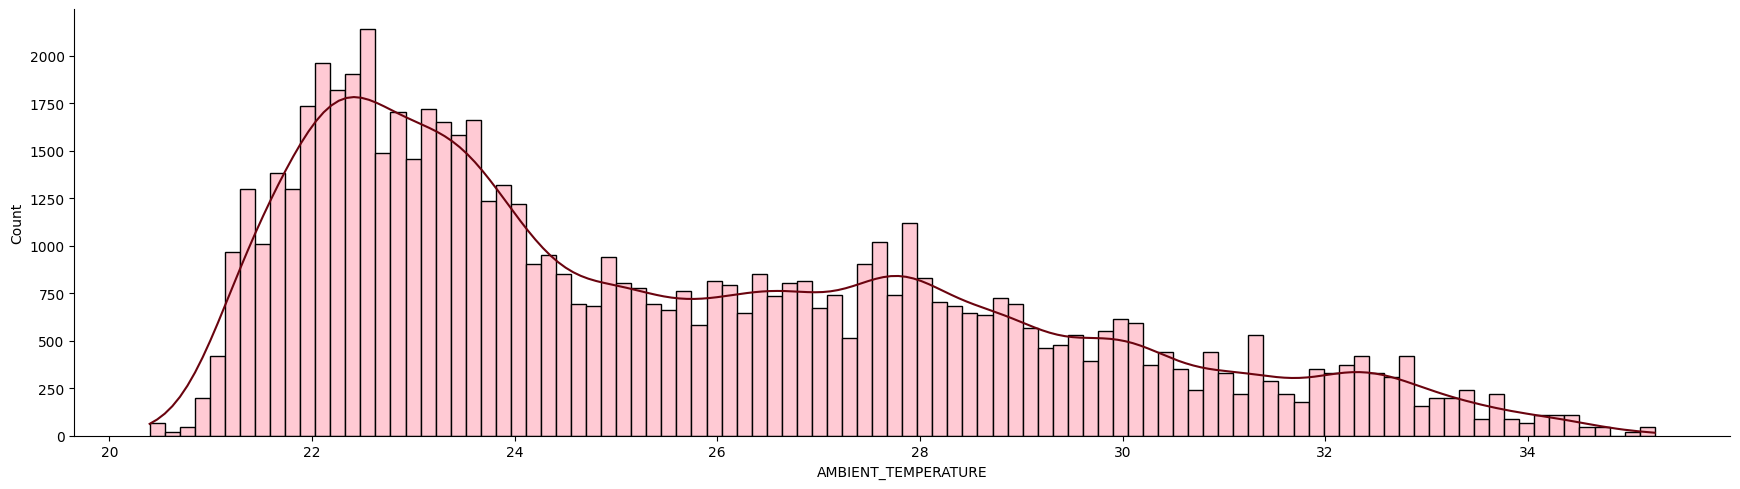

In [14]:
sns.displot(data=solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "#6a040f", facecolor = "#ffcad4",height = 5, aspect = 3.5);

In [15]:
solar['DATE'].nunique()

34

# Multiple Plotting of DC_POWER generation on per day basis.

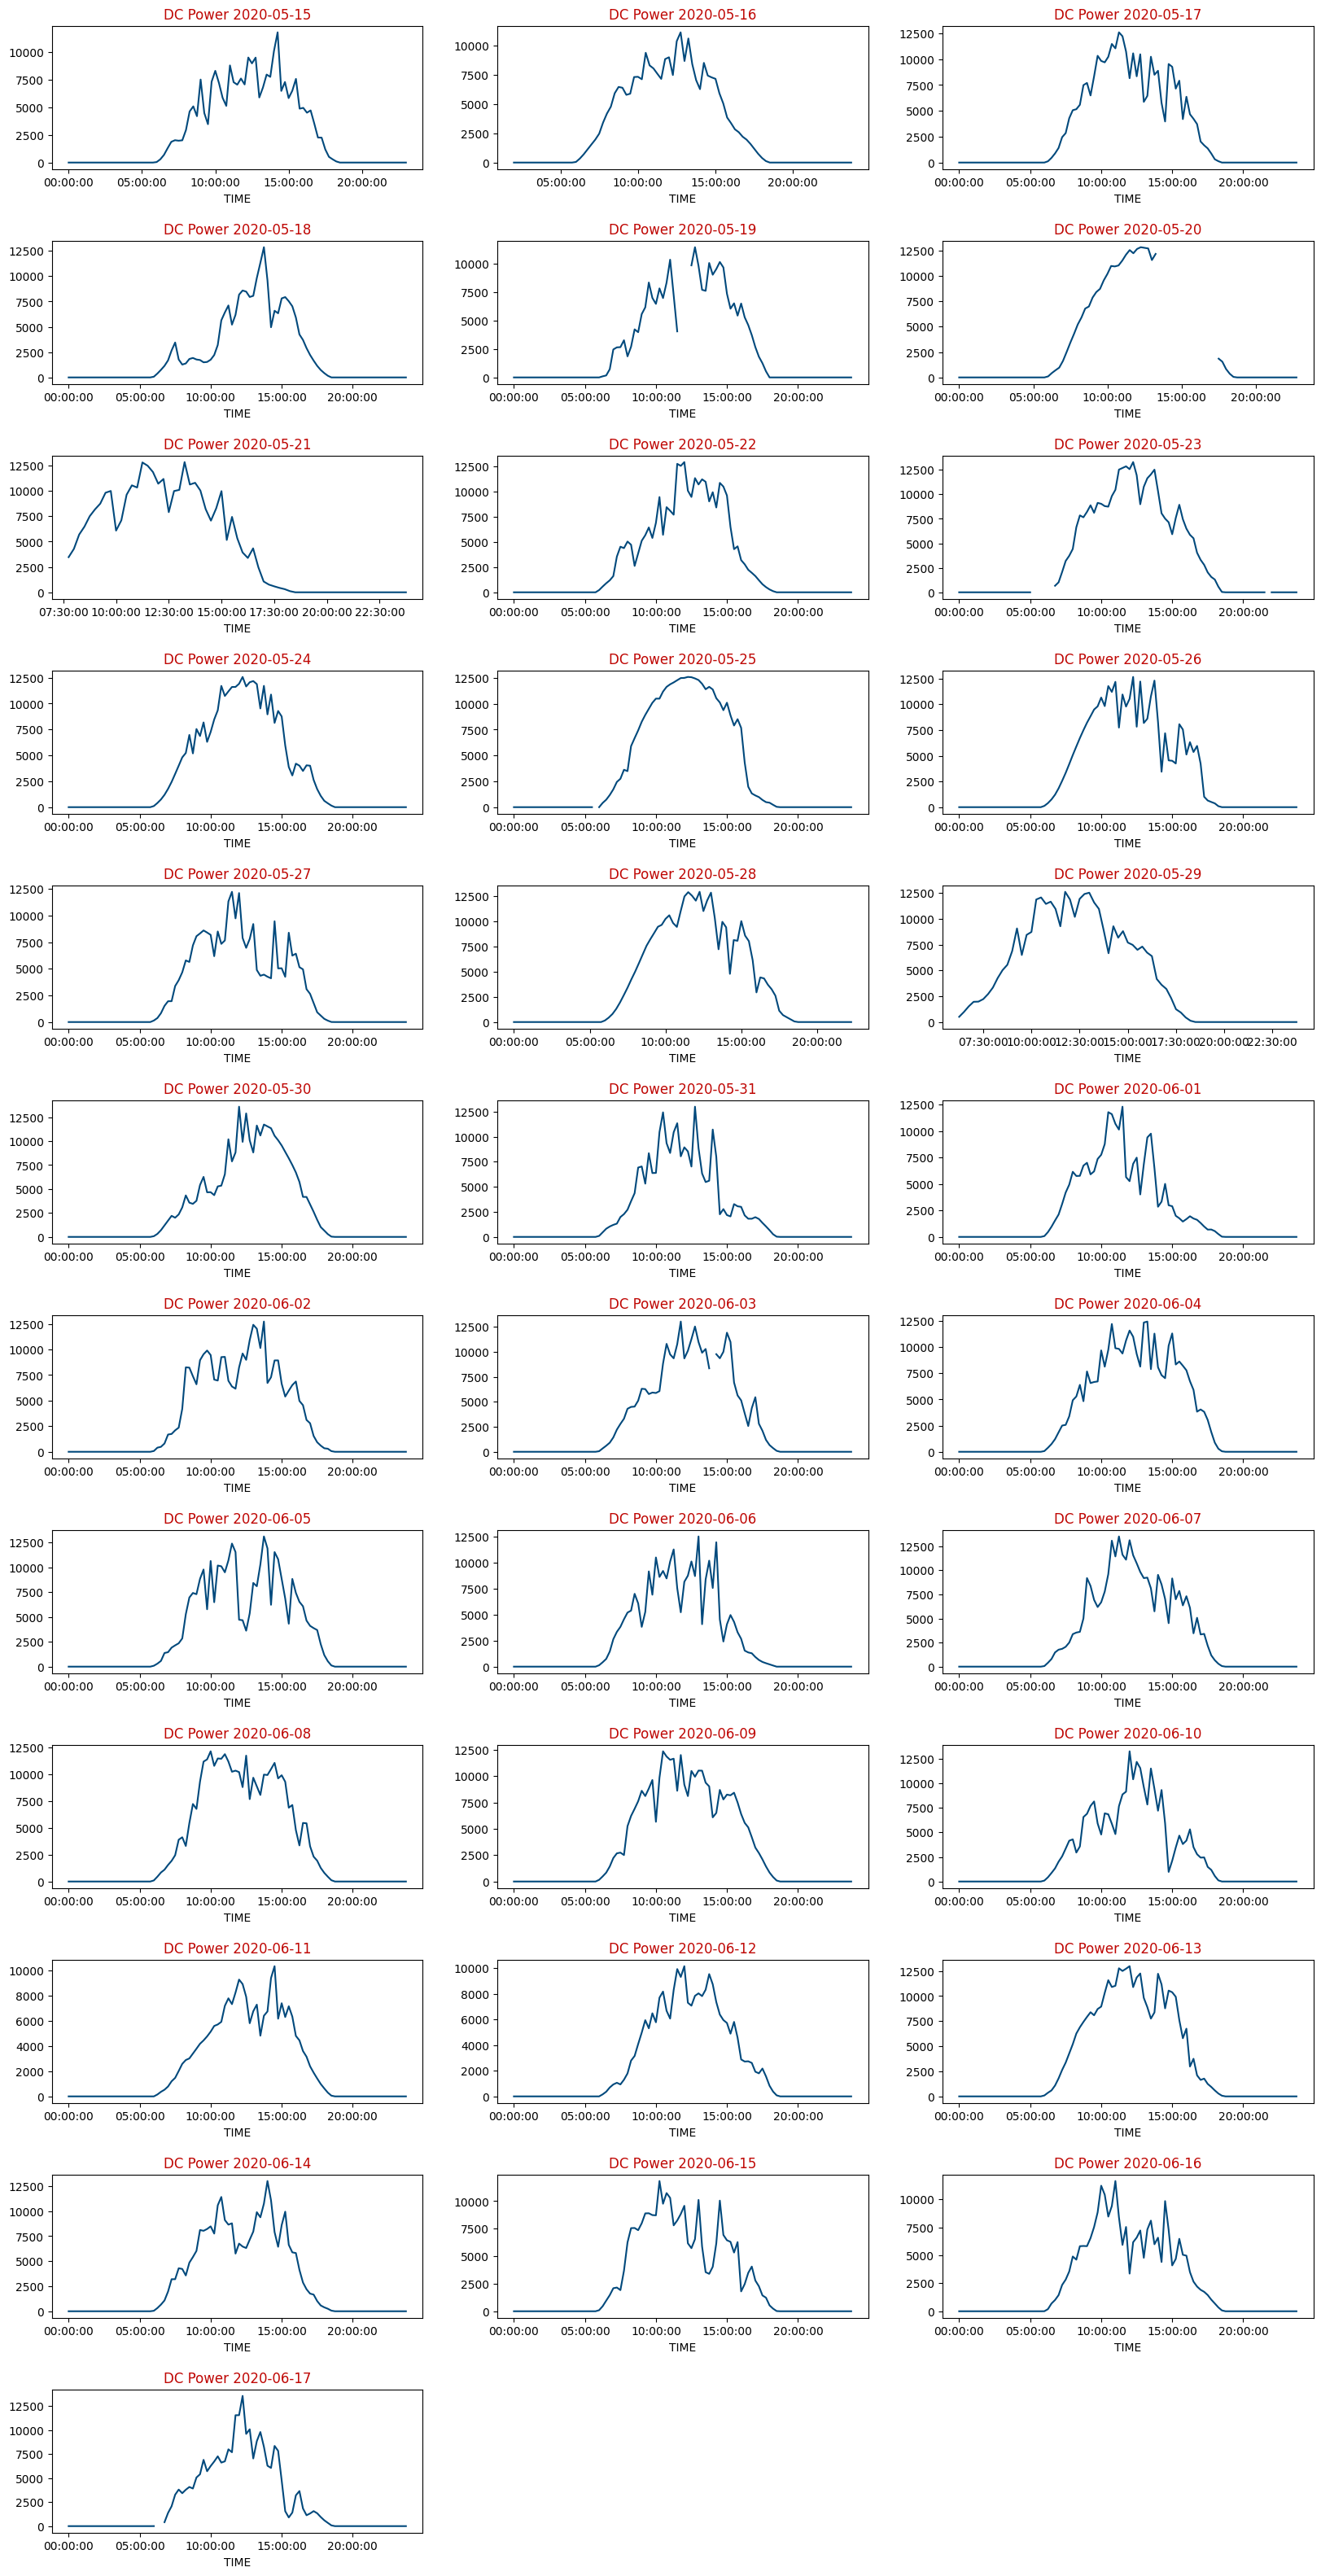

In [16]:
solar_dc = solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='#01497c')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='#bf0603')

daywise_plot(data=solar_dc, row=12, col=3)

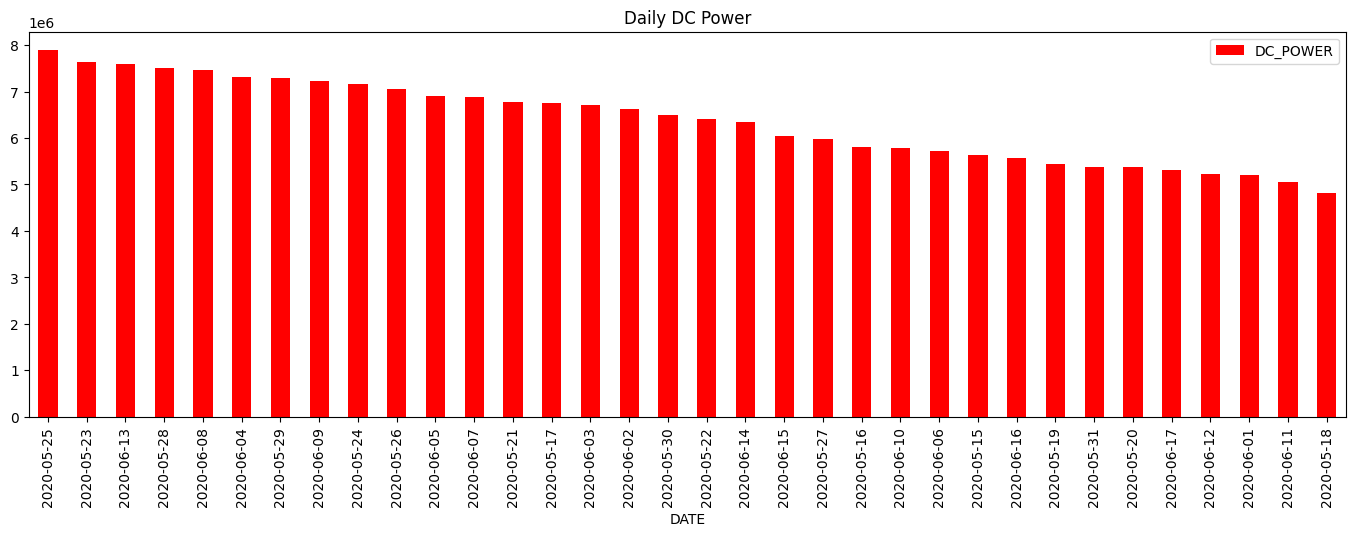

In [17]:
daily_dc = solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

# Multiple Plotting of IRRADIATION generation on per day basis.

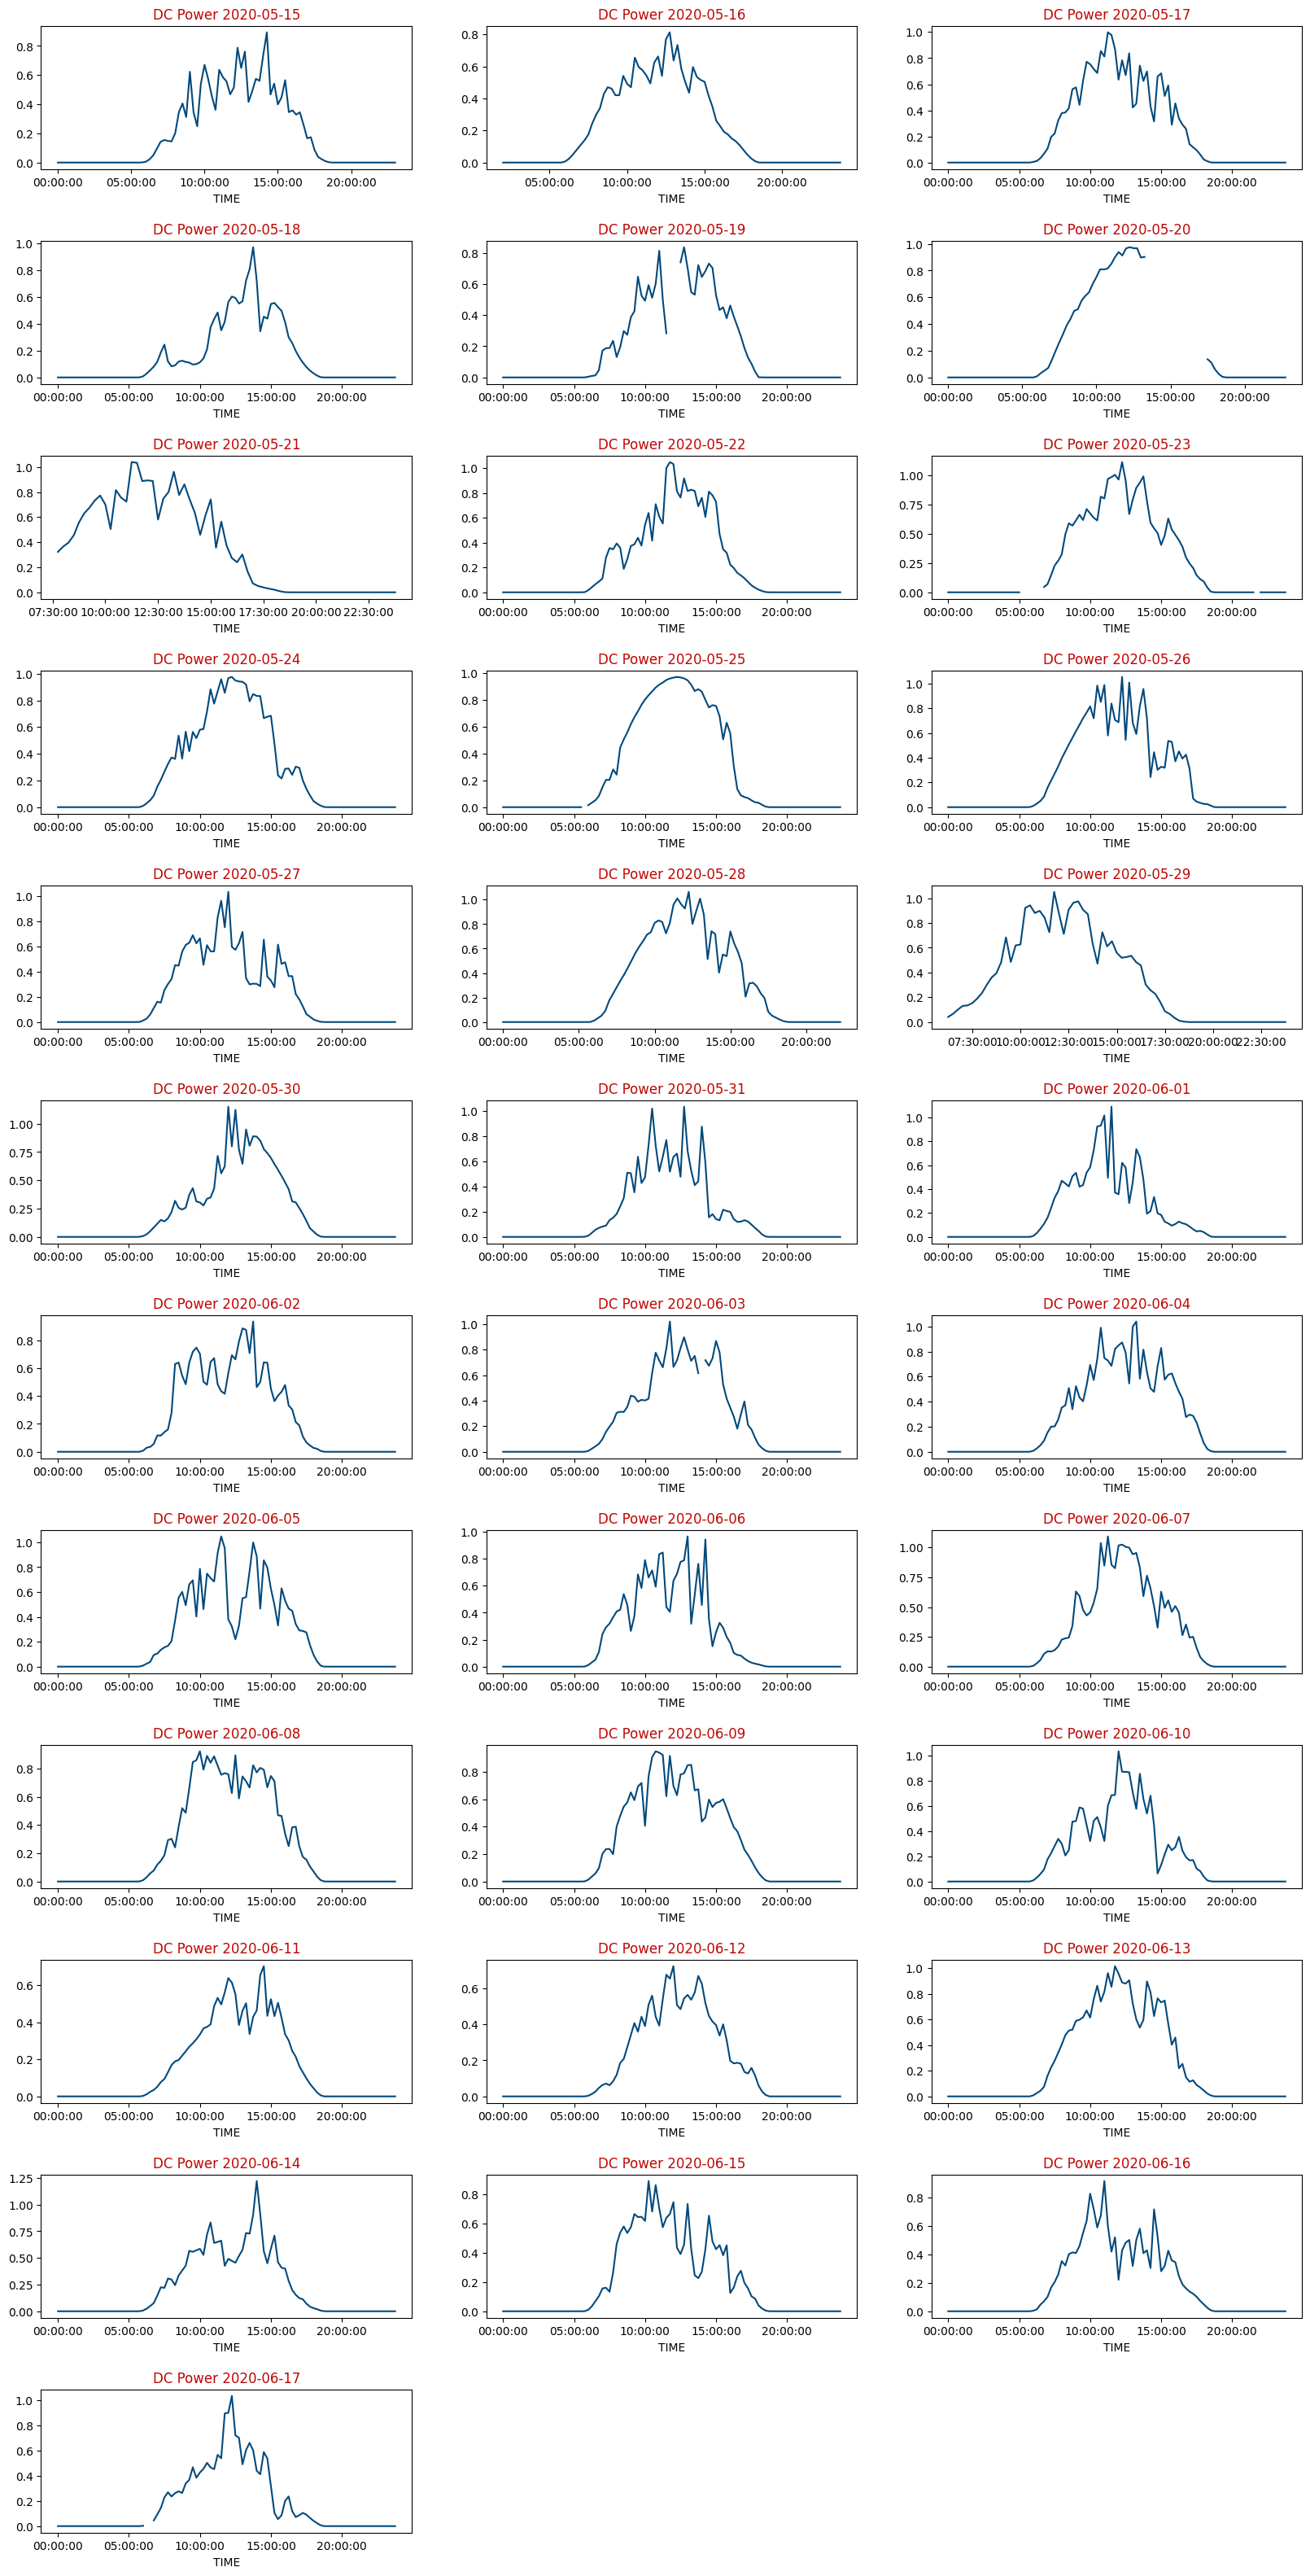

In [18]:
solar_irrad = solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='#01497c')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='#bf0603')

daywise_plot(data=solar_irrad, row=12, col=3)

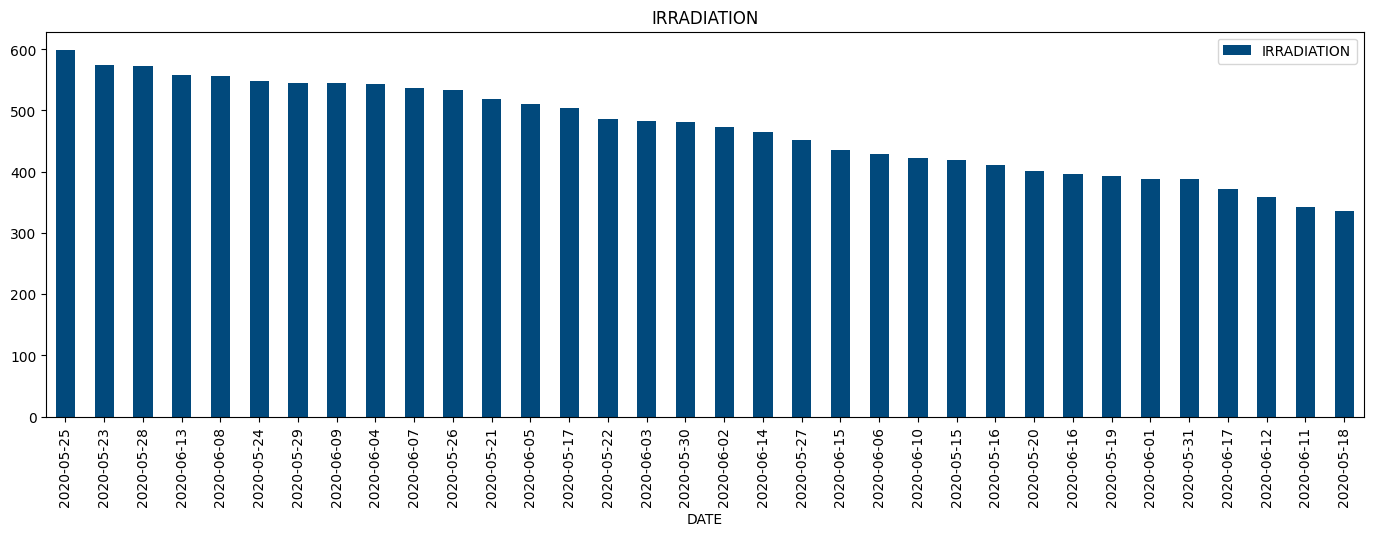

In [19]:
daily_irradiation = solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='#01497c')
plt.title('IRRADIATION')
plt.show()

# Multiple Plotting of Ambient Temperature on per day basis.

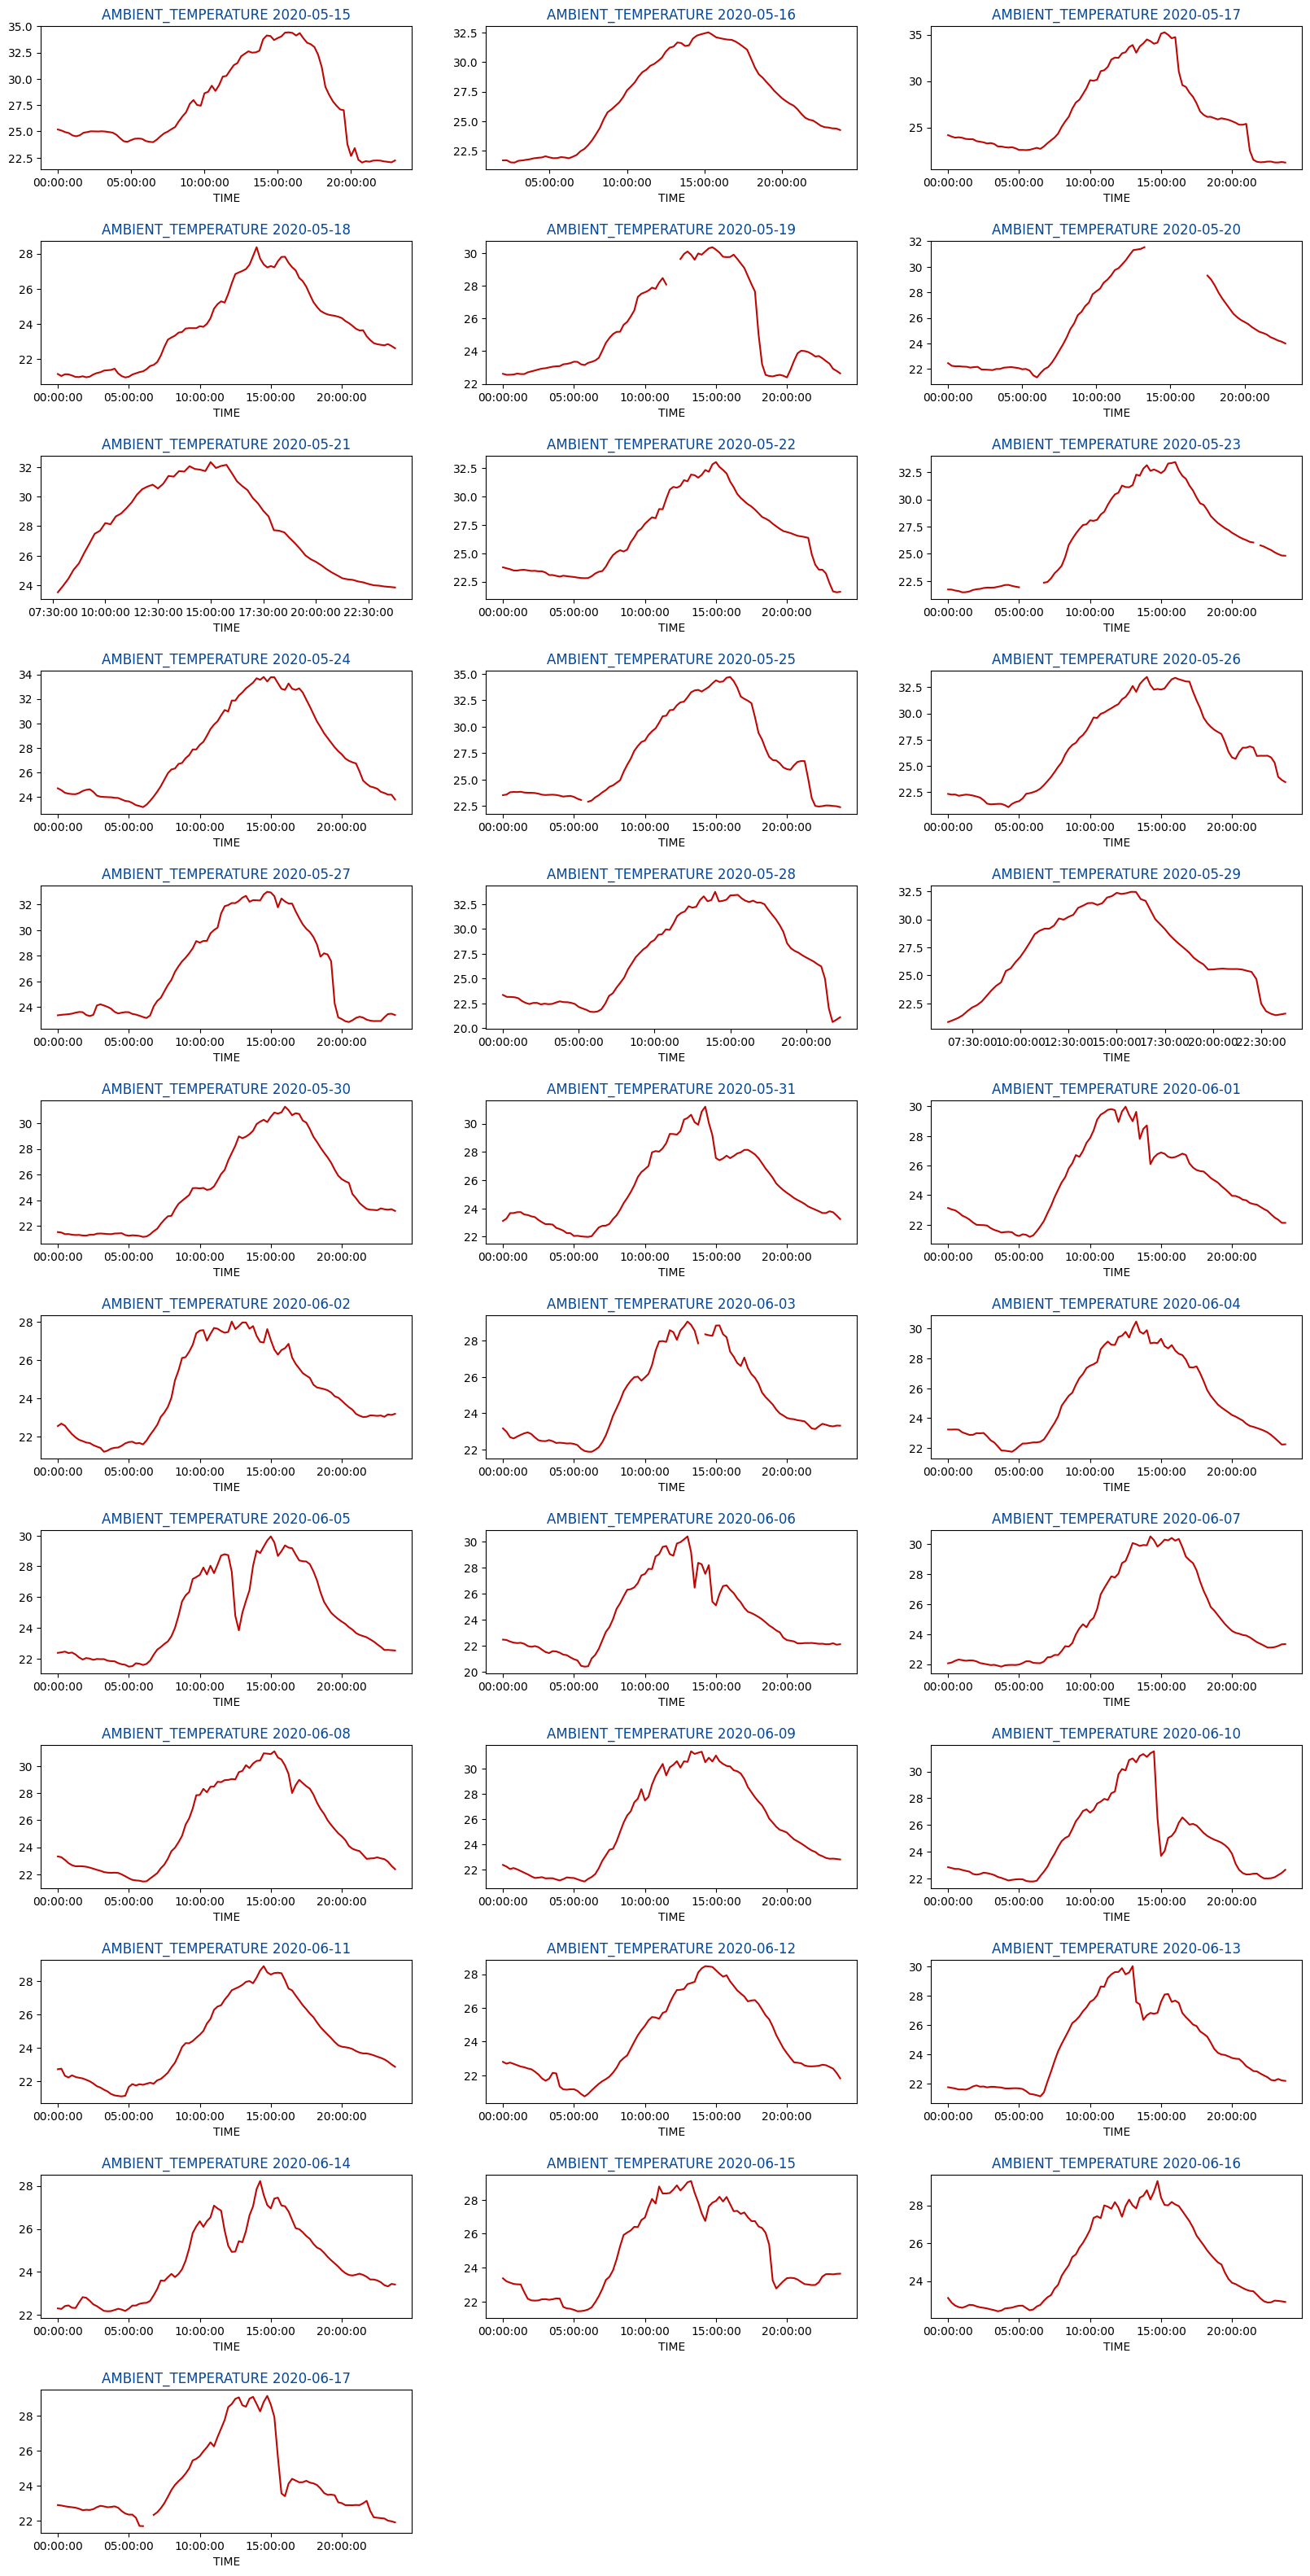

In [20]:
solar_ambiant_temp = solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='#bf0603')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='#01479c')

daywise_plot(data=solar_ambiant_temp, row=12, col=3)

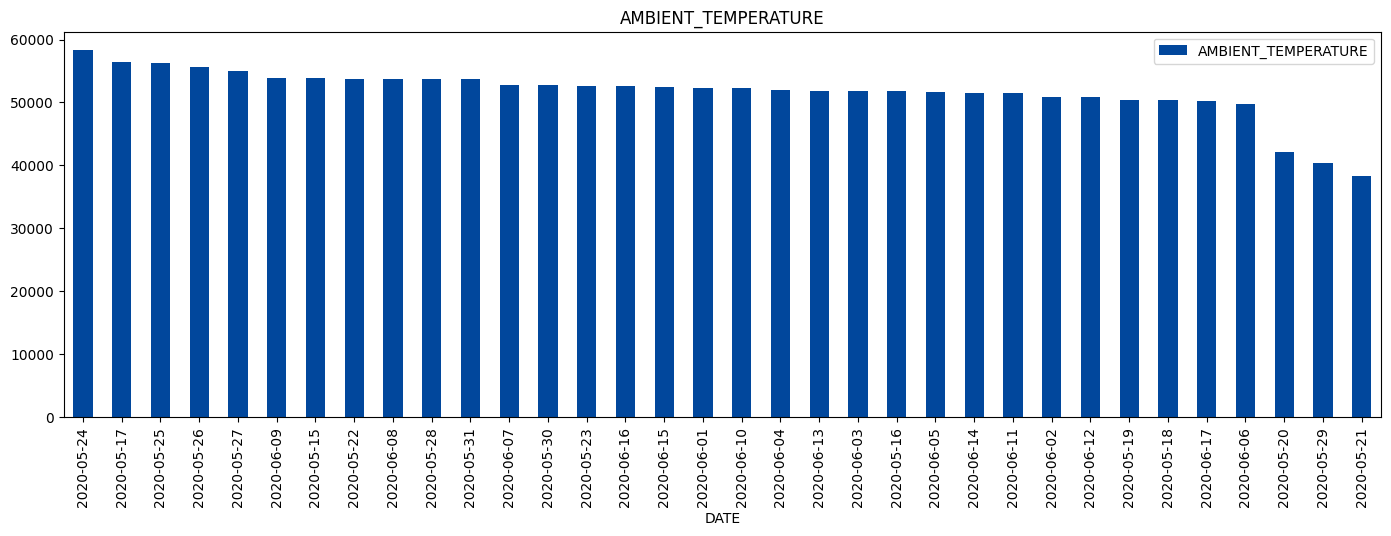

In [21]:
daily_ambient_temp = solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='#01479c')
plt.title('AMBIENT_TEMPERATURE')
plt.show()


# Highest Average on a Particular Day

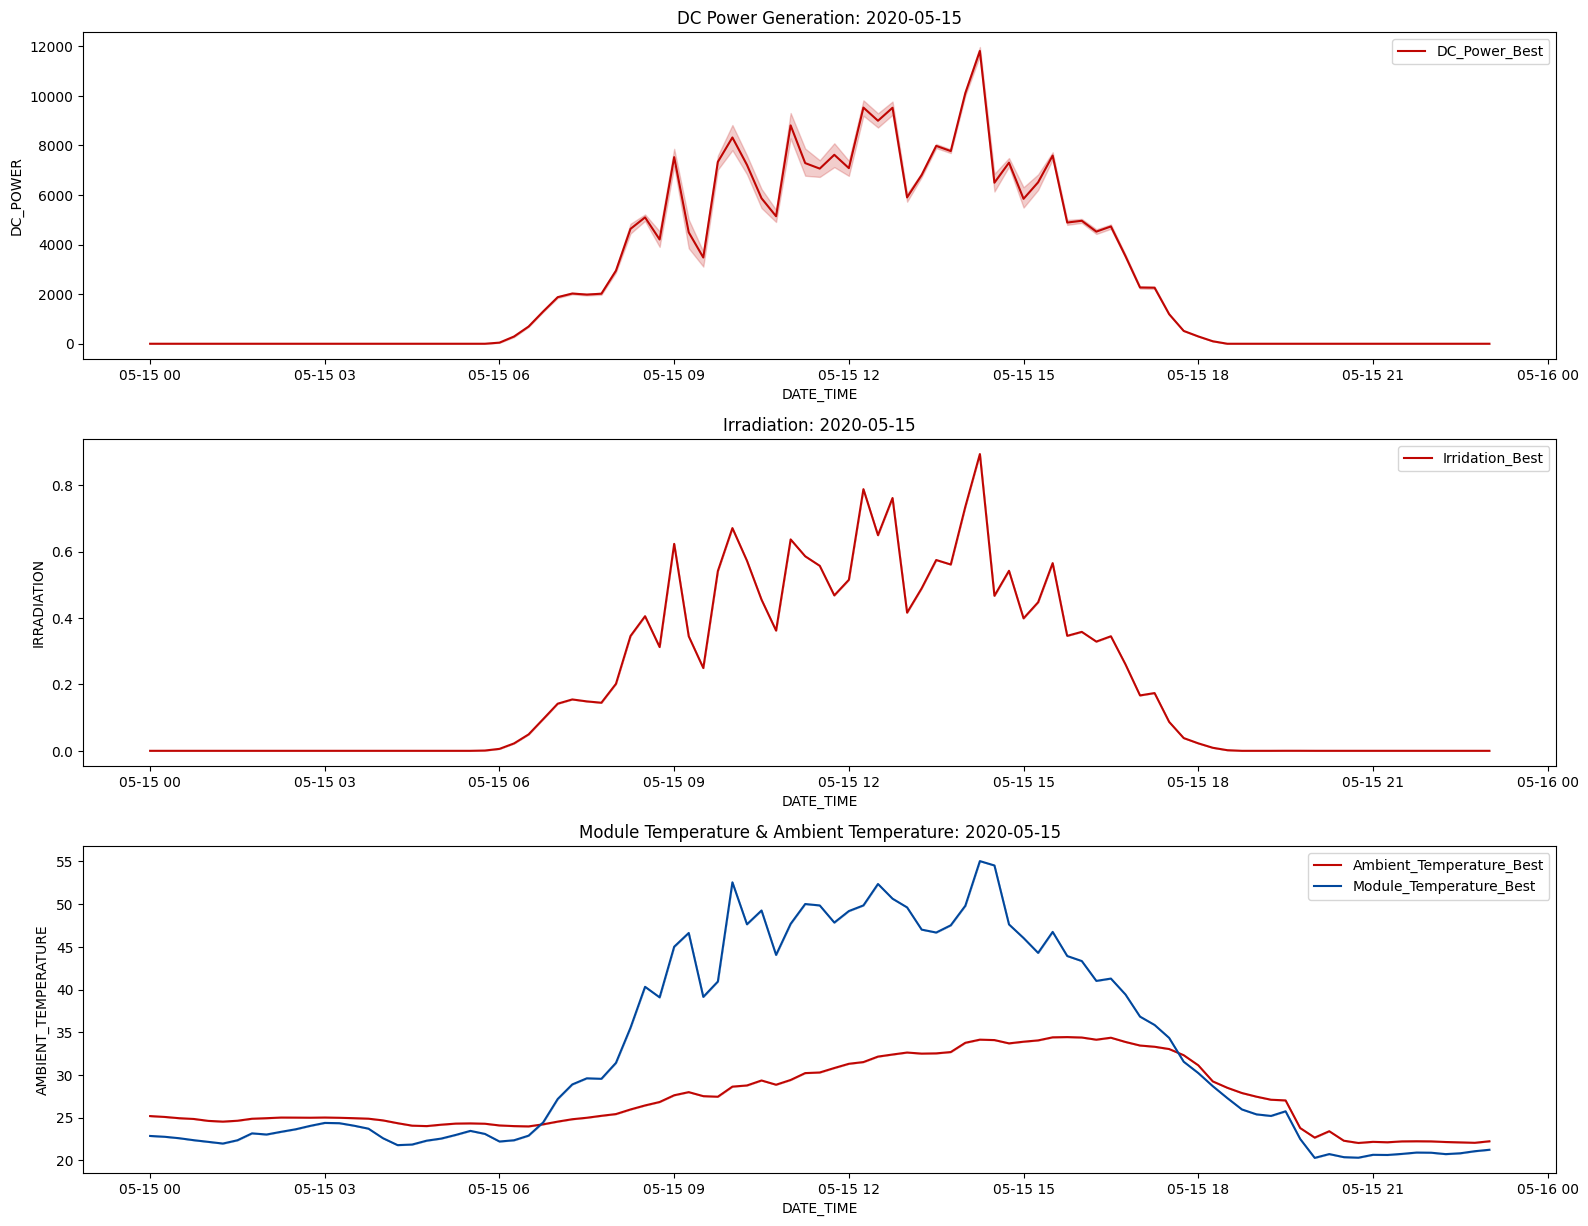

In [23]:
plt.figure(figsize=(16, 16))

date = ["2020-05-15"]

plt.subplot(411)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best", color='#bf0603')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Best", color='#bf0603')
plt.title("Irradiation: {}".format(date[0]))


plt.subplot(413)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best", color='#bf0603')
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best", color='#01479c')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

Low Fluctuations and close to ideal graph

# Lowest Average on a Particular Day

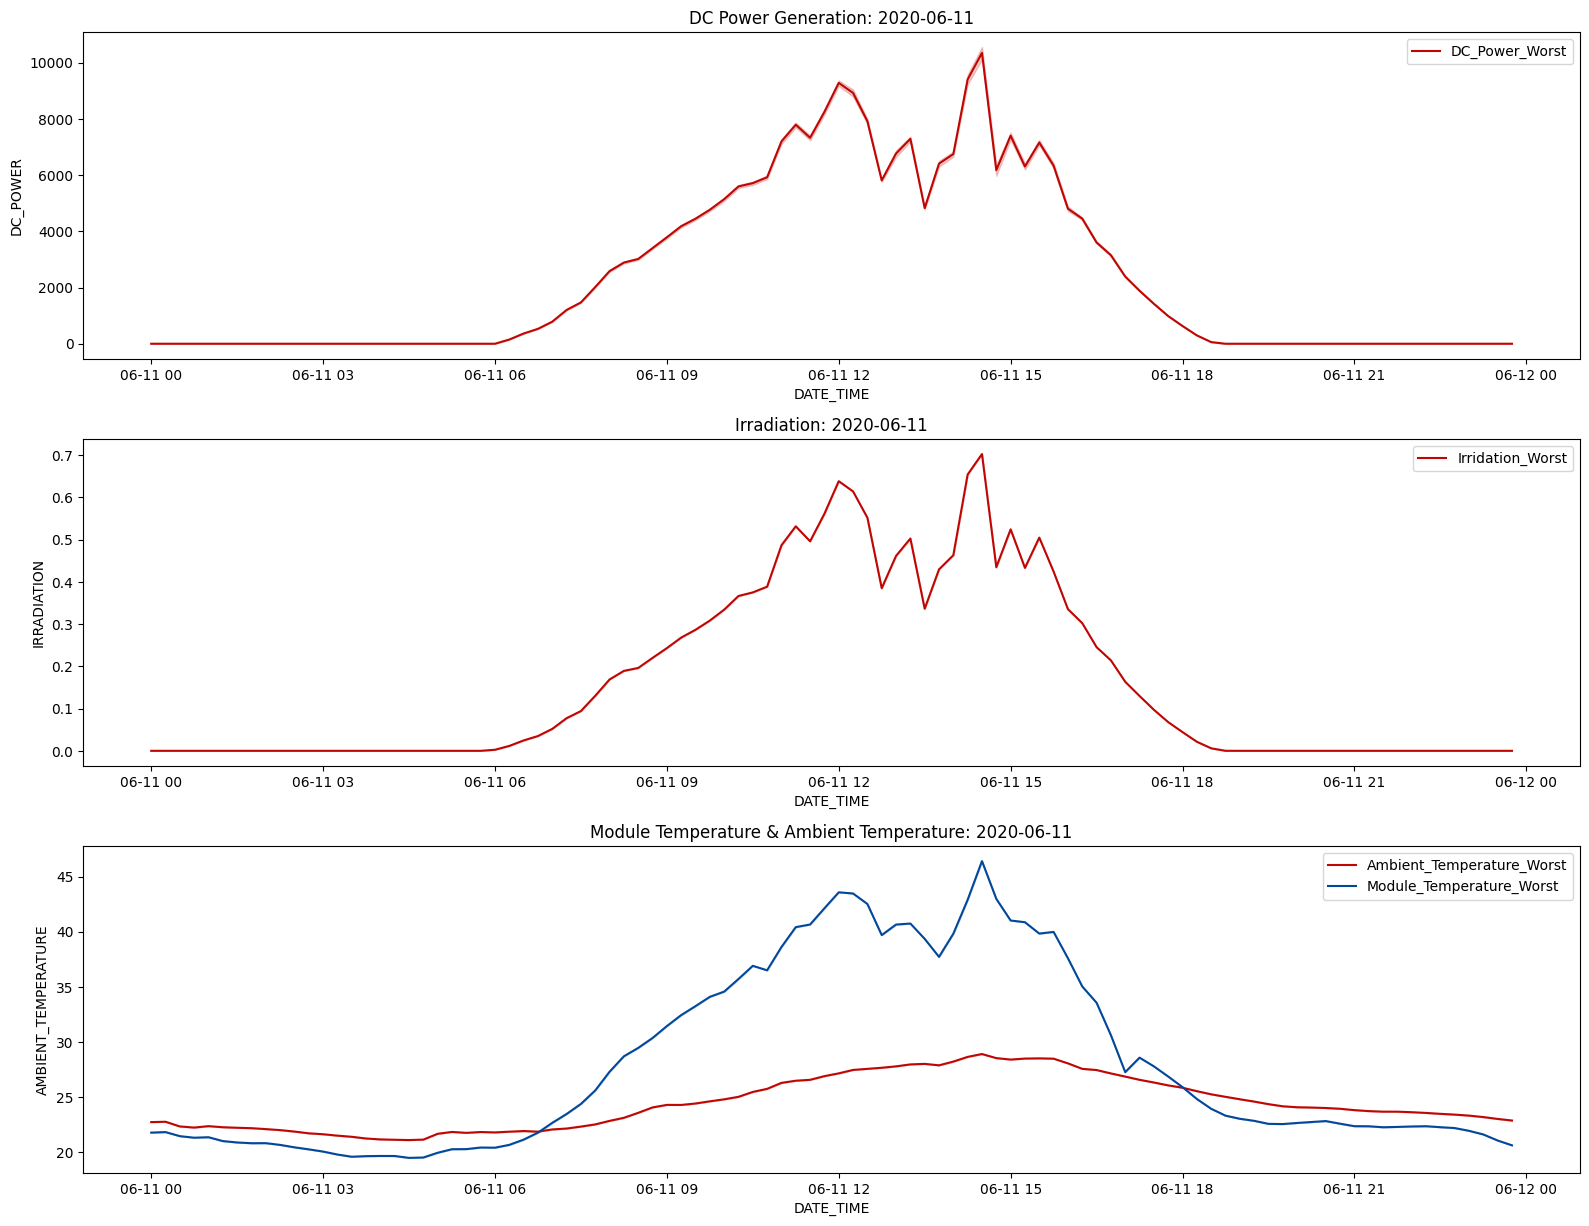

In [24]:

plt.figure(figsize=(16, 16))

date = ["2020-06-11"]


plt.subplot(411)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Worst", color='#bf0603')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Worst", color='#bf0603')
plt.title("Irradiation: {}".format(date[0]))


plt.subplot(413)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Worst", color='#bf0603')
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Worst", color='#01479c')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()


Very Large Fluctuations in both DC_Power and Irradiation

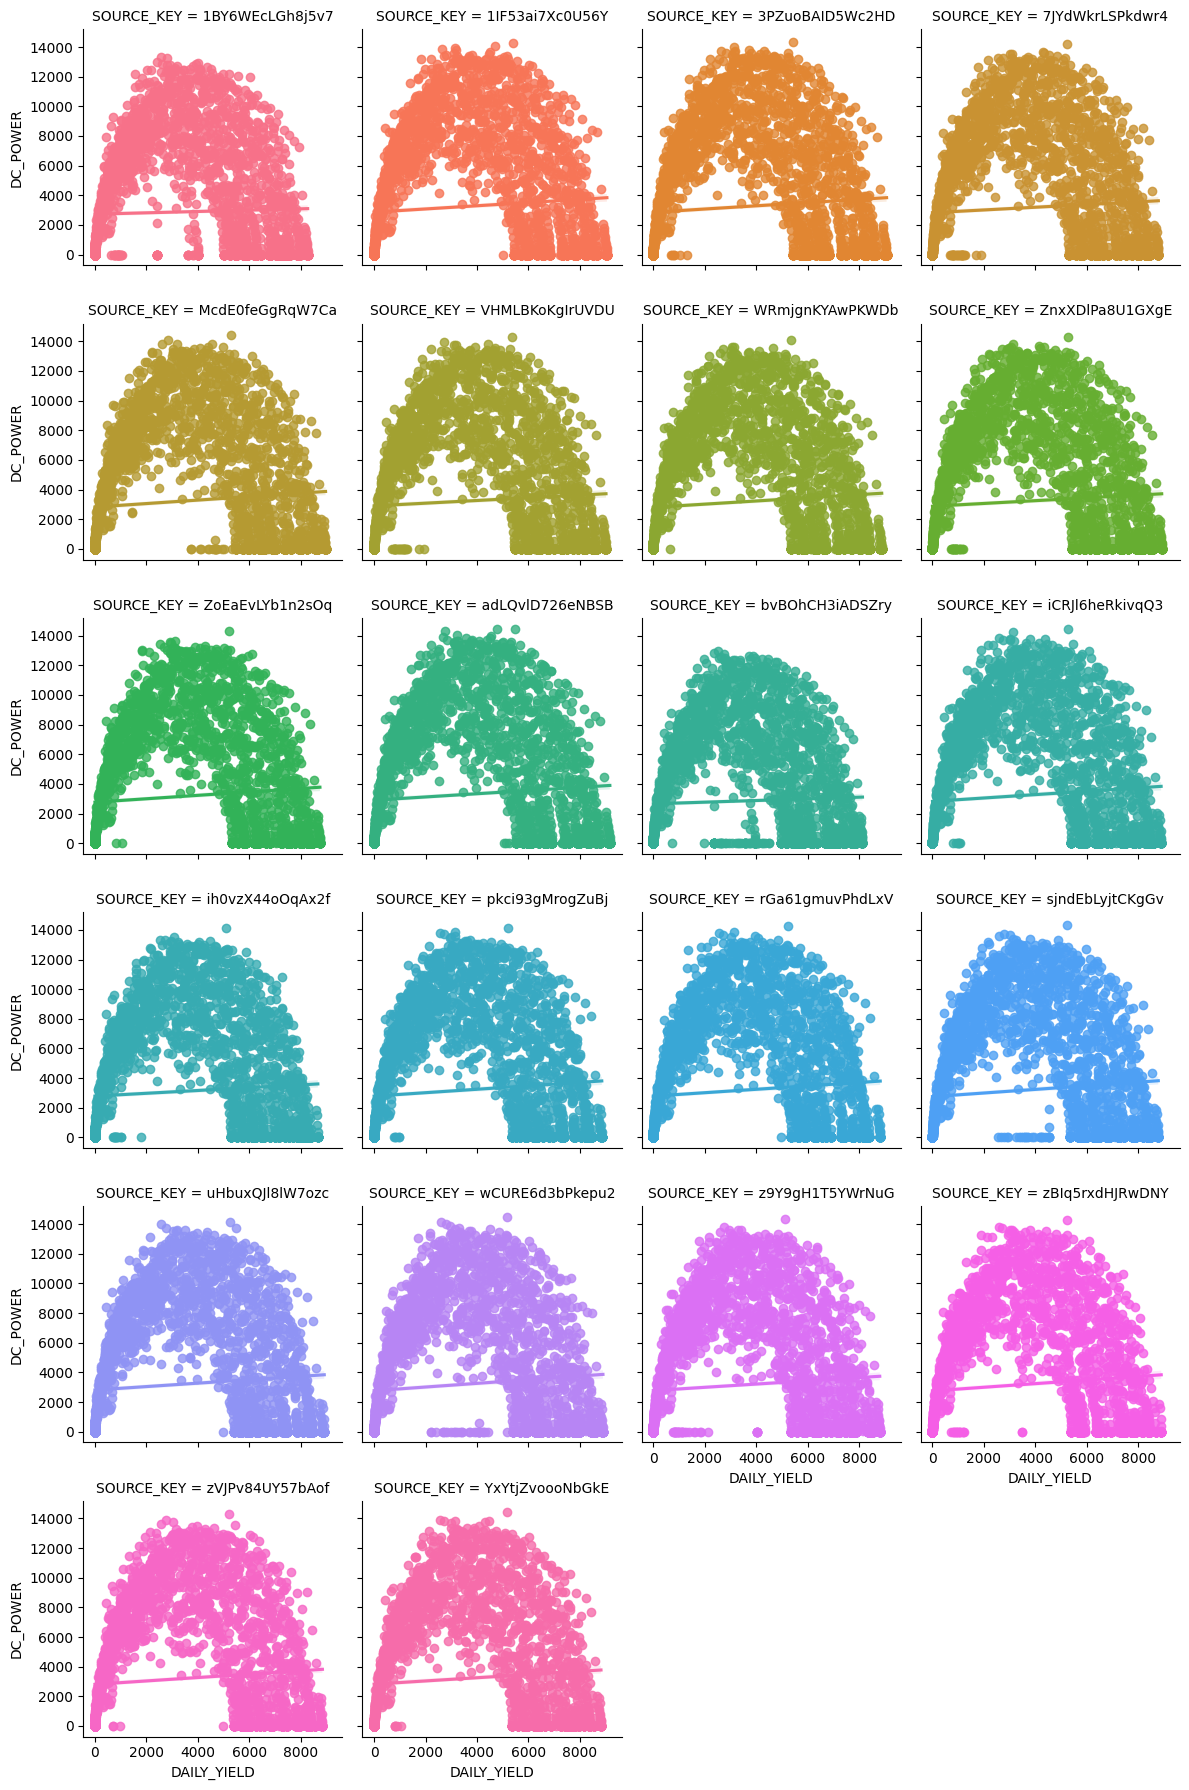

In [25]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=solar,fit_reg=True);

# Solar Power Plant Inverter Efficiency Calculation


In [26]:
solar_dc_power = solar[solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = solar[solar['AC_POWER'] > 0]['AC_POWER'].values

In [27]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  9.750 %


In [28]:
AC_list=[]
for i in solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
AC_list.sort()
AC_list.reverse()
len(AC_list)

36823

In [29]:
DC_list=[]
for i in solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

36823

[8.75, 8.875, 8.875, 9.0, 9.25, 9.5, 9.5, 9.625, 10.0, 10.25, 10.625, 10.625, 11.125, 11.14285714, 11.75, 11.75, 11.75, 11.85714286, 12.0, 12.25, 12.28571429, 12.28571429, 12.42857143, 12.42857143, 12.57142857, 12.625, 12.71428571, 13.0, 13.0, 13.0, 13.125, 13.14285714, 13.25, 13.375, 13.42857143, 14.14285714, 14.28571429, 14.42857143, 14.57142857, 15.25, 15.42857143, 16.14285714, 19.5, 20.0, 21.0, 21.71428571, 22.25, 22.375, 22.5, 22.625, 22.75, 22.75, 22.875, 22.875, 22.875, 22.875, 23.0, 23.125, 23.5, 23.5, 23.75, 23.875, 24.0, 24.0, 24.125, 24.375, 24.375, 24.42857143, 24.5, 24.5, 24.5, 24.57142857, 24.625, 24.625, 24.75, 25.0, 25.0, 25.25, 25.42857143, 25.71428571, 25.85714286, 25.85714286, 25.85714286, 25.875, 26.0, 26.0, 26.0, 26.0, 26.0, 26.125, 26.25, 26.25, 26.28571429, 26.625, 26.71428571, 26.71428571, 26.71428571, 26.85714286, 26.85714286, 26.85714286, 26.875, 27.0, 27.25, 27.42857143, 27.5, 28.0, 28.0, 28.0, 28.0, 28.14285714, 28.28571429, 28.28571429, 28.28571429, 28.4285

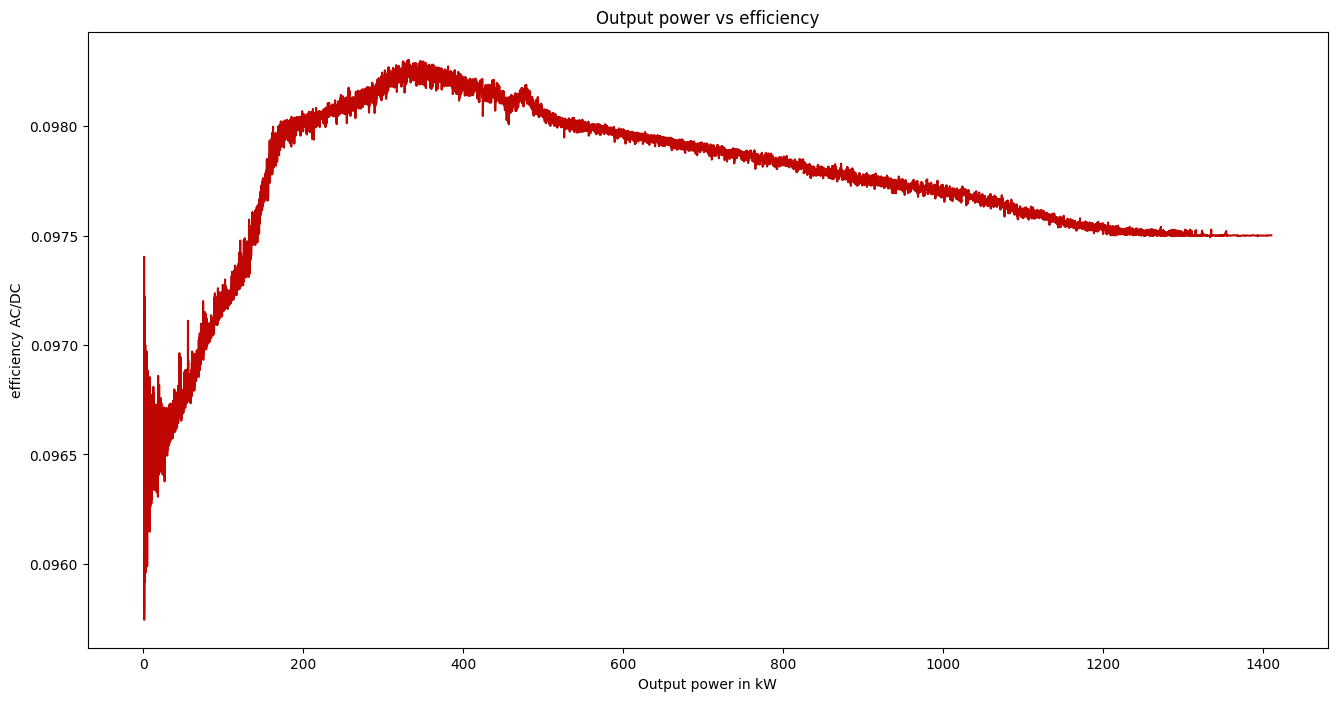

In [30]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()

print(DC_list)
DC_list.sort

res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='#bf0603')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

# Solar Power Prediction

In [31]:
solar2 = solar.copy()

X = solar2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
Y = solar2['AC_POWER']

In [32]:
X.sample(10)

DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
14473     5961.125    6.368e+06               33.005              55.633   
40358     2433.875    6.425e+06               28.610              53.499   
6906       688.571    7.180e+06               23.838              27.240   
37757        0.000    7.348e+06               22.300              21.042   
47188     6415.625    6.960e+06               26.890              27.108   
60927        4.875    7.399e+06               22.568              21.948   
37117        0.000    7.741e+06               23.031              20.323   
21687        0.000    6.265e+06               21.067              18.777   
32793     5796.000    7.223e+06               24.927              22.313   
56135     2598.500    6.504e+06               22.883              20.635   

       IRRADIATION   DC_POWER  
14473        0.728   8818.500  
40358        0.990  12000.000  
6906         0.142   2241.714  
37757        0.000      0.000  
47188        0.046    680.625  
60927        0.024    314.000  
37117        0.000      0.000  
21687        0.000      0.000  
32793        0.000      0.000  
56135        0.000      0.000

In [33]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=21)

## Model Score and R^2 Score

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)

score_lr = 100*lr_clf.score(X_test,Y_test)
print(f'LR Model score = {score_lr:4.4f}%')


y_pred_lr = lr_clf.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,Y_test) * 100, 2)

print("R2 Score (LR): ",R2_Score_lr,"%")

LR Model score = 99.9995%
R2 Score (LR):  100.0 %


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

raw_score_rfr = 100 * rfr.score(X_test, Y_test)
print(f'RF Model Raw Score: {raw_score_rfr:4.4f}%')

y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr, Y_test) * 100, 2)
print("R2 Score (RF):", R2_Score_rfr, "%")

RF Model Raw Score: 99.9999%
R2 Score (RF): 100.0 %


### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

raw_score_dtr = 100 * dtr.score(X_test, Y_test)
print(f'DT Model Raw Score: {raw_score_dtr:4.4f}%')

y_pred_dtr = dtr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr, Y_test) * 100, 2)
print("R2 Score (DT):", R2_Score_dtr, "%")

DT Model Raw Score: 99.9999%
R2 Score (DT): 100.0 %


# Result Prediction

### Linear Regression Prediction

In [38]:
lr_pred= lr_clf.predict(X_test)
print(lr_pred)

[1.58558020e-01 1.07278685e+03 2.98083620e+02 ... 6.69297020e+02
 3.76066021e+02 1.18389895e+02]


In [39]:
crosscheck_lr = pd.DataFrame({'Actual' : Y_test , 'Predicted' : lr_pred})
crosscheck_lr.head()

Actual  Predicted
43819     0.000      0.159
2949   1072.325   1072.787
33769   299.812    298.084
47825     0.000      0.299
29370     0.000      0.259

In [40]:
crosscheck_lr['Error'] = crosscheck_lr['Actual'] - crosscheck_lr['Predicted']
crosscheck_lr.head()

Actual  Predicted  Error
43819     0.000      0.159 -0.159
2949   1072.325   1072.787 -0.462
33769   299.812    298.084  1.729
47825     0.000      0.299 -0.299
29370     0.000      0.259 -0.259

In [41]:
crosscheckfinal_lr  = crosscheck_lr[crosscheck_lr['Error'] <= 20]
crosscheckfinal_lr.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

### Random Forest Prediction

In [ ]:
prediction = rfr.predict(X_test)
print(prediction)

In [ ]:
cross_checking = pd.DataFrame({'Actual' : Y_test , 'Predicted' : prediction})
cross_checking.head()

In [ ]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

In [ ]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

### Decision Tree Prediction

In [ ]:
dtr_pred = dtr.predict(X_test)
print(dtr_pred)

In [ ]:
crosscheck_dtr = pd.DataFrame({'Actual' : Y_test , 'Predicted' : dtr_pred})
crosscheck_dtr.head()

In [ ]:
crosscheck_dtr['Error'] = crosscheck_dtr['Actual'] - crosscheck_dtr['Predicted']
crosscheck_dtr.head()

In [ ]:
crosscheckfinal_dtr  = crosscheck_dtr[crosscheck_dtr['Error'] <= 20]
crosscheckfinal_dtr.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

# Training and Testing Score

In [ ]:
# Linear Regression
# Calculate the training score
train_lr = lr_clf.score(X_train, Y_train)

# Calculate the testing score
test_lr = lr_clf.score(X_test, Y_test)

# Display results
print('Linear Regression: ')
print(f'Training Score: {train_lr}')
print(f'Testing Score:  {test_lr}')

# ------------------------------------------------------------------

# Random Forest
# Calculate the training score
train_rfr = rfr.score(X_train, Y_train)

# Calculate the testing score
test_rfr = rfr.score(X_test, Y_test)

# Display results
print('\nRandom Forest Regressor: ')
print(f'Training Score: {train_rfr}')
print(f'Testing Score:  {test_rfr}')

# ------------------------------------------------------------------

# Decision Tree
# Calculate the training score
train_dtr = dtr.score(X_train, Y_train)

# Calculate the testing score
test_dtr = dtr.score(X_test, Y_test)

# Display results
print('\nDecision Tree Regressor: ')
print(f'Training Score: {train_dtr}')
print(f'Testing Score:  {test_dtr}')
